In [ ]:
%%capture
!mamba install -y -c conda-forge tensorflow stardist
!pip install cellpose

In [ ]:
!pip install imagej

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 488.6/488.6 kB 8.2 MB/s eta 0:00:00


In [ ]:
import imagej
import imagej.convert as convert
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
!pip install csbdeep

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.3/71.3 kB 3.1 MB/s eta 0:00:00


In [ ]:
!pip install stardist


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 13.3 MB/s eta 0:00:00


In [ ]:
# Install Maven
!apt-get install -y maven

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libaopalliance-java libapache-pom-java libatinject-jsr330-api-java libcdi-api-java
  libcommons-cli-java libcommons-io-java libcommons-lang3-java libcommons-parent-java
  libgeronimo-annotation-1.3-spec-java libgeronimo-interceptor-3.0-spec-java libguava-java
  libguice-java libhawtjni-runtime-java libjansi-java libjansi-native-java libjsr305-java
  libmaven-parent-java libmaven-resolver-java libmaven-shared-utils-java libmaven3-core-java
  libplexus-cipher-java libplexus-classworlds-java libplexus-component-annotations-java
  libplexus-interpolation-java libplexus-sec-dispatcher-java libplexus-utils2-java
  libsisu-inject-java libsisu-plexus-java libslf4j-java libwagon-file-java
  libwagon-http-shaded-java libwagon-provider-api-java
Suggested packages:
  libaopalliance-java-doc libatinject-jsr330-api-java-doc libel-api-java libcommons-

In [ ]:
import imagej

# Initialize ImageJ with headless mode
mode = "headless"
ij = imagej.init(mode=mode)
print(f"ImageJ2 version: {ij.getVersion()}")


ImageJ2 version: 2.15.0/1.54f


In [ ]:
import sys
import imagej
import imagej.convert as convert
import numpy as np
import matplotlib.pyplot as plt
from cellpose import models
from csbdeep.utils import normalize
from stardist.models import StarDist2D

# initialize ImageJ
mode = "interactive"
if sys.platform == "darwin":
    mode = "headless"

ij = imagej.init(mode=mode)
print(f"ImageJ2 version: {ij.getVersion()}")

ImageJ2 version: 2.15.0/Inactive


In [ ]:
def filter_index_image(narr: np.ndarray, min_size:int, max_size:int):
    """
    Filter an index image's labels with a pixel size range.
    """
    unique = np.unique(narr)
    for label in unique:
        if label == 0:
            # skip the background
            continue

        # create a crop for each label
        bbox = get_bounding_box(np.where(narr == label))
        bbox_crop = narr[bbox[0]:bbox[2] + 1, bbox[1]:bbox[3] + 1].copy()
        bbox_crop[bbox_crop != label] = 0

        # get the number of pixels in label
        bbox_crop = bbox_crop.astype(bool)
        label_size = np.sum(bbox_crop)

        if not min_size <= label_size <= max_size:
            narr[narr == label] = 0

    return narr

def get_bounding_box(indices: np.ndarray):
    """
    Get the bounding box coordinates from a the label indices.
    """
    # get min and max bounds of indices array
    min_row = np.min(indices[0])
    min_col = np.min(indices[1])
    max_row = np.max(indices[0])
    max_col = np.max(indices[1])

    return (min_row, min_col, max_row, max_col)

Shape of xdata: (1000, 1000)


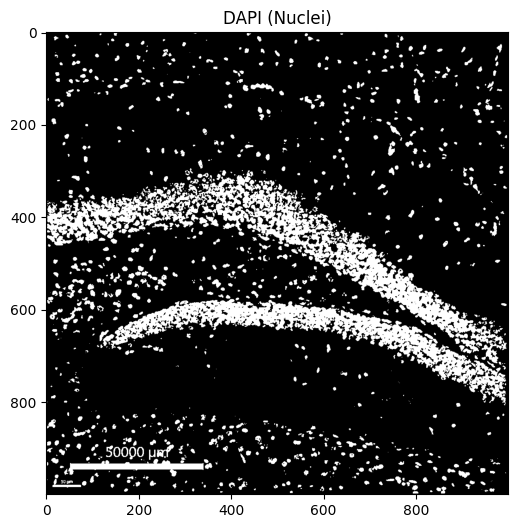

In [ ]:
# Import necessary libraries
import imagej
import matplotlib.pyplot as plt

# Initialize ImageJ in headless mode
ij = imagej.init(mode='headless')

# Open the image data and convert it to Python from Java
data = ij.io().open('/content/DAPI.tif (blue) Thredholded.png')
xdata = ij.py.from_java(data)

# Print the shape of xdata to understand its dimensions
print("Shape of xdata:", xdata.shape)

# Create a matplotlib subplot for displaying the DAPI channel
fig, ax = plt.subplots(1, 1, figsize=(6, 6))

# Plot the image data assuming it's already in the DAPI channel
ax.imshow(xdata, cmap="gray")
ax.set_title('DAPI (Nuclei)')

# Display the plot
plt.show()




Shape of xdata: (1000, 1000)


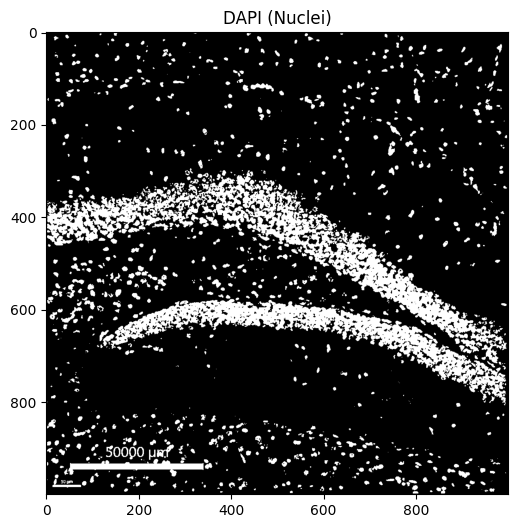

Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.


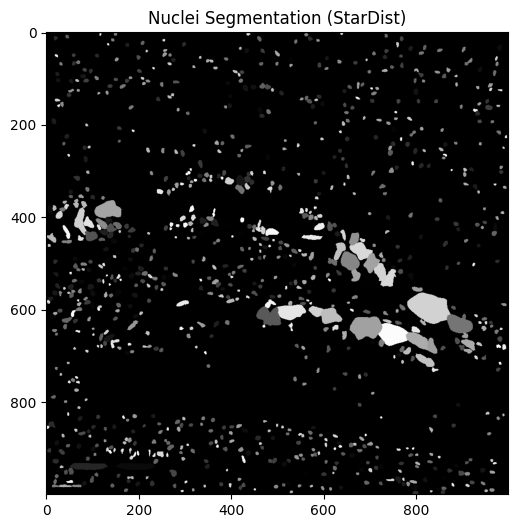

In [ ]:
import imagej
import matplotlib.pyplot as plt
import numpy as np
from cellpose import models
from csbdeep.utils import normalize
from stardist.models import StarDist2D

# Initialize ImageJ in headless mode
ij = imagej.init(mode='headless')

# Open the image data and convert it to Python from Java
data = ij.io().open('/content/DAPI.tif (blue) Thredholded.png')
xdata = ij.py.from_java(data)

# Print the shape of xdata to understand its dimensions
print("Shape of xdata:", xdata.shape)

# Single channel case (assuming the input is single-channel)
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
ax.imshow(xdata, cmap="gray")
ax.set_title('DAPI (Nuclei)')
plt.show()

# Run StarDist on the nuclei channel
model_stardist = StarDist2D.from_pretrained('2D_versatile_fluo')

# Adjust the parameters for more fine segmentation
prob_thresh = 0.5  # Increase sensitivity
nms_thresh = 0.1   # Lower value to separate close objects

# Normalize and predict instances
nuc_labels, _ = model_stardist.predict_instances(normalize(xdata), prob_thresh=prob_thresh, nms_thresh=nms_thresh)

# Display the StarDist segmentation
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
ax.imshow(nuc_labels, cmap="gray")
ax.set_title('Nuclei Segmentation (StarDist)')
plt.show()

